In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
customer_df = customer_df.rename(columns=str.lower)
customer_df.columns = customer_df.columns.str.replace(' ','_')

In [3]:
#I'll drop the customer column because it's an identifier
customer_df = customer_df.drop(['customer'], axis=1)

In [4]:
#I'm going to take the continious variables to remove their outliers
def split(numericals):
    for col in numericals:
        if (numericals[col].nunique()/len(numericals)) > 0.01:
            continuous_df[col] = numericals[col]
        else: 
                discrete_df[col] = numericals[col]
    return continuous_df, discrete_df

numericals = customer_df.select_dtypes(np.number)
continuous_df = pd.DataFrame()
discrete_df = pd.DataFrame()
continuous_df, discrete_df = split(numericals)

/Users/victor/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


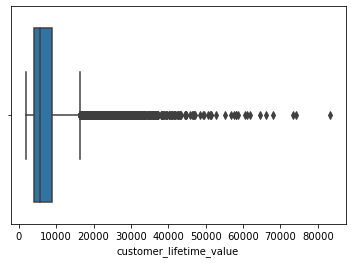

/Users/victor/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


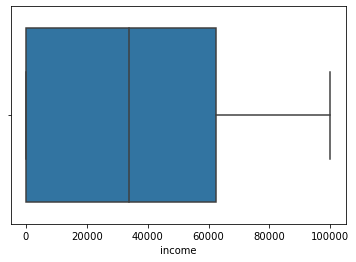

/Users/victor/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


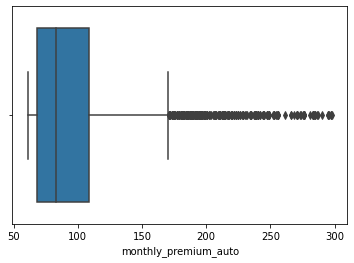

/Users/victor/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


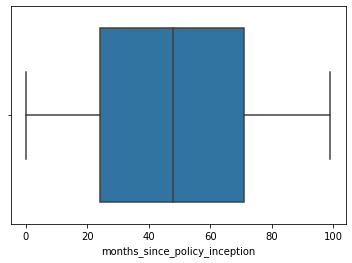

/Users/victor/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


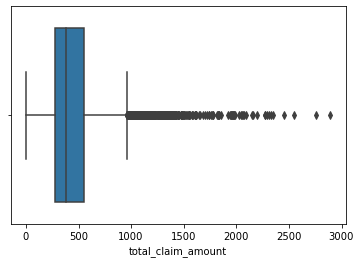

In [5]:
for col in continuous_df.columns:
    sns.boxplot(continuous_df[col])
    plt.show()

In [6]:
#I can observe that there are outliers in three continuous variables:
#customer_lifetime_value, monthly_premium_auto and total_claim_amount

In [7]:
#I'll clean them with a logaritmic transformation

In [8]:
def CleanOutliers(df, continuousCol):
    for col in continuousCol:
        iqr = np.nanpercentile(continuousCol[col],75) - np.nanpercentile(continuousCol[col],25)
        upper_limit = np.nanpercentile(continuousCol[col],75) + 1.5*iqr
        
        df = df[df[col] <= upper_limit]
    return df


In [9]:
customer_df_copy = CleanOutliers(customer_df, continuous_df)

In [10]:
customer_df_copy = customer_df_copy.reset_index()
customer_df_copy = customer_df_copy.drop(['index'], axis=1)

In [11]:
#After eliminating the outliers, I'll split the data
y = customer_df_copy['total_claim_amount']
X = customer_df_copy.drop(['total_claim_amount'], axis=1)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=100)

In [12]:
numericals_train = X_train.select_dtypes(np.number)
numericals_test = X_test.select_dtypes(np.number)

In [ ]:
#I'll split numericals in discrete and continuous

In [13]:
numericals_train_disc = numericals_train[['months_since_last_claim', 'number_of_open_complaints', 'number_of_policies']]
numericals_train_cont = numericals_train.drop(['months_since_last_claim', 'number_of_open_complaints', 'number_of_policies'], axis=1)

In [14]:
numericals_test_disc = numericals_test[['months_since_last_claim', 'number_of_open_complaints', 'number_of_policies']]
numericals_test_cont = numericals_test.drop(['months_since_last_claim', 'number_of_open_complaints', 'number_of_policies'], axis=1)

In [15]:
numericals_train_disc = numericals_train_disc.to_numpy(dtype='int')
numericals_test_disc = numericals_test_disc.to_numpy(dtype='int')

In [16]:
#I'm going to standarize the continuous variables
from sklearn.preprocessing import StandardScaler

transformer = StandardScaler().fit(numericals_train_cont)
numericals_train_standardized = transformer.transform(numericals_train_cont)
numericals_test_standardized = transformer.transform(numericals_test_cont)

In [17]:
numericals_train_standardized = np.concatenate((numericals_train_standardized,numericals_train_disc),axis=1)
numericals_test_standardized = np.concatenate((numericals_test_standardized,numericals_test_disc),axis=1)


In [18]:
categoricals_train= X_train.select_dtypes(object)
categoricals_test= X_test.select_dtypes(object)

In [19]:
#First, I'll use ordinal encoding for some of the columns

In [20]:
categoricals_train_encoded = pd.DataFrame()
categoricals_train_encoded['response'] = categoricals_train['response'].map({'Yes': 1, 'No': 0}).astype(int)
categoricals_train_encoded['coverage'] = categoricals_train['coverage'].map({"Basic" : 0, "Extended" : 1, "Premium" : 2}).astype(int)
categoricals_train_encoded['education'] = categoricals_train['education'].map({'Bachelor': 0, 'College': 1, 'High School or Below': 2, 'Master': 3, 'Doctor': 4}).astype(int)
categoricals_train_encoded['employmentstatus'] = categoricals_train['employmentstatus'].map({'Employed': 0, 'Unemployed': 1, 'Medical Leave': 2, 'Disabled': 3, 'Retired': 4}).astype(int)
categoricals_train_encoded['gender'] = categoricals_train['gender'].map({'F': 1, 'M': 0}).astype(int)
categoricals_train_encoded['location_code'] = categoricals_train['location_code'].map({'Suburban': 0, 'Rural': 1, 'Urban': 2}).astype(int)
categoricals_train_encoded['vehicle_size'] = categoricals_train['vehicle_size'].map({'Medsize': 0, 'Small': 1, 'Large': 2}).astype(int)
categoricals_train = categoricals_train.drop(['response', 'coverage', 'education', 'employmentstatus', 'gender', 'location_code', 'vehicle_size' ], axis=1)

In [21]:
categoricals_test_encoded = pd.DataFrame()
categoricals_test_encoded['response'] = categoricals_test['response'].map({'Yes': 1, 'No': 0}).astype(int)
categoricals_test_encoded['coverage'] = categoricals_test['coverage'].map({"Basic" : 0, "Extended" : 1, "Premium" : 2}).astype(int)
categoricals_test_encoded['education'] = categoricals_test['education'].map({'Bachelor': 0, 'College': 1, 'High School or Below': 2, 'Master': 3, 'Doctor': 4}).astype(int)
categoricals_test_encoded['employmentstatus'] = categoricals_test['employmentstatus'].map({'Employed': 0, 'Unemployed': 1, 'Medical Leave': 2, 'Disabled': 3, 'Retired': 4}).astype(int)
categoricals_test_encoded['gender'] = categoricals_test['gender'].map({'F': 1, 'M': 0}).astype(int)
categoricals_test_encoded['location_code'] = categoricals_test['location_code'].map({'Suburban': 0, 'Rural': 1, 'Urban': 2}).astype(int)
categoricals_test_encoded['vehicle_size'] = categoricals_test['vehicle_size'].map({'Medsize': 0, 'Small': 1, 'Large': 2}).astype(int)
categoricals_test = categoricals_test.drop(['response', 'coverage', 'education', 'employmentstatus', 'gender', 'location_code', 'vehicle_size' ], axis=1)

In [22]:
#Now, I have to encode effective_to_date, I will split this column in three new columns
#I searched for a function to do it and I found: .dt.strftime
categoricals_train['effective_to_date'] = pd.to_datetime(categoricals_train['effective_to_date'])
categoricals_train_encoded['month'] = categoricals_train['effective_to_date'].dt.strftime('%m').astype(int)
categoricals_train_encoded['day'] = categoricals_train['effective_to_date'].dt.strftime('%d').astype(int)
categoricals_train_encoded['year'] = categoricals_train['effective_to_date'].dt.strftime('%y').astype(int)
categoricals_train = categoricals_train.drop(['effective_to_date'], axis=1)

In [23]:
categoricals_test['effective_to_date'] = pd.to_datetime(categoricals_test['effective_to_date'])
categoricals_test_encoded['month'] = categoricals_test['effective_to_date'].dt.strftime('%m').astype(int)
categoricals_test_encoded['day'] = categoricals_test['effective_to_date'].dt.strftime('%d').astype(int)
categoricals_test_encoded['year'] = categoricals_test['effective_to_date'].dt.strftime('%y').astype(int)
categoricals_test = categoricals_test.drop(['effective_to_date'], axis=1)

In [24]:
categoricals_train_encoded.head()

,response,coverage,education,employmentstatus,gender,location_code,vehicle_size,month,day,year
6043,0,0,2,3,0,0,0,1,19,11
1599,0,0,0,0,0,2,1,2,8,11
4496,0,0,1,1,0,0,0,2,27,11
717,0,1,2,0,1,0,0,1,29,11
2590,0,0,0,0,1,0,1,2,24,11


In [25]:
categoricals_train_encoded.dtypes

response            int64
coverage            int64
education           int64
employmentstatus    int64
gender              int64
location_code       int64
vehicle_size        int64
month               int64
day                 int64
year                int64
dtype: object

In [26]:
#I'll convert them to np to work with them in the next steps
categoricals_train_encoded = categoricals_train_encoded.to_numpy(dtype='int')
categoricals_test_encoded = categoricals_test_encoded.to_numpy(dtype='int')

In [27]:
#Now, I'm goig to encode the others with the OHE
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(categoricals_train)
categoricals_train_encoded_OHE = encoder.transform(categoricals_train).toarray()
categoricals_test_encoded_OHE = encoder.transform(categoricals_test).toarray()


In [28]:
categoricals_train_encoded = np.concatenate((categoricals_train_encoded,categoricals_train_encoded_OHE),axis=1)
categoricals_test_encoded = np.concatenate((categoricals_test_encoded,categoricals_test_encoded_OHE),axis=1)

In [29]:
X_train = np.concatenate((numericals_train_standardized,categoricals_train_encoded),axis=1)
X_test = np.concatenate((numericals_test_standardized,categoricals_test_encoded),axis=1)

In [30]:
#I'll define a function to try LR and KNN
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier

def PredModels(X_train, y_train, X_test, y_test, n=5):
    lm = linear_model.LinearRegression()
    lm.fit(X_train,y_train)
    
    KNN = KNeighborsRegressor(n_neighbors=n)
    KNN.fit(X_train, y_train)
    
    print("LR score:", lm.score(X_test, y_test))
    print("KNN score:", KNN.score(X_test, y_test))

In [31]:
PredModels(X_train, y_train, X_test, y_test)

LR score: 0.48227914685146667
KNN score: 0.31828923169275136


In [32]:
#I'll try KNeighborsRegressor with different n of neighbors
scores = []
for k in range(2,15):
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
scores

[0.16887124409978216,
 0.2705465343068403,
 0.3125898106549104,
 0.31828923169275136,
 0.3126574074898236,
 0.3208263944223576,
 0.3208297396139532,
 0.31876956633404707,
 0.31808673638208995,
 0.31671767250010296,
 0.310844531029826,
 0.31114940856546114,
 0.3099799288290578]

Text(0, 0.5, 'Accuracy')

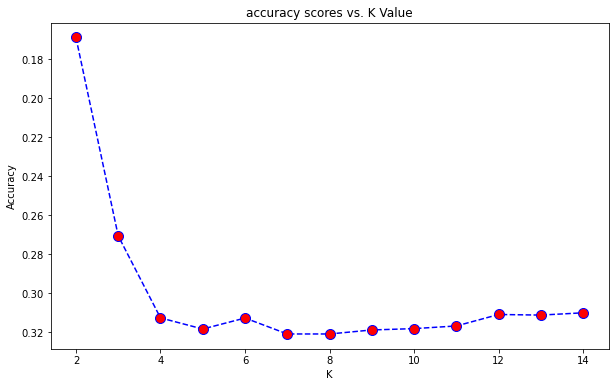

In [33]:
plt.figure(figsize=(10,6))
plt.plot(range(2,15),scores,color = 'blue', linestyle='dashed',
         marker='o', markerfacecolor='red', markersize=10)
plt.title('accuracy scores vs. K Value')
plt.gca().invert_yaxis()
plt.xlabel('K')
plt.ylabel('Accuracy')

In [34]:
#As I can see in the graph, the best option is using k=5
#Score: 0.31828923169275136

In [35]:
#I'll try with different weights
KNN = KNeighborsRegressor(n_neighbors=5, weights='distance')
KNN.fit(X_train, y_train)
print("KNN score:", KNN.score(X_test, y_test))

KNN score: 0.3344044775215044


In [36]:
# The score is better this time

In [37]:
#I'm going to try the MLPRegressor
#Help: https://python.hotexamples.com/es/examples/sklearn.neural_network/MLPRegressor/-/python-mlpregressor-class-examples.html
from sklearn.neural_network import MLPRegressor

clf = MLPRegressor(solver='lbfgs', hidden_layer_sizes=50, max_iter=20000,
                       random_state=1)
clf.fit(X_train, y_train)
print("MLPRegressor score:",clf.score(X_test, y_test))


MLPRegressor score: 0.7931490837391985


In [38]:
#I got the best score but i'm not sure how it works